In [1]:
# Importing
import theano.tensor as T
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

%matplotlib inline
#%matplotlib notebook

In [2]:
geo_data = GeMpy.import_data([0,10,0,10,0,10])

In [3]:
# =========================
# DATA GENERATION IN PYTHON
# =========================
# Layers coordinates
layer_1 = np.array([[3,4,7], [4,5,7], [6.5,4,5]])#-np.array([5,5,4]))/8+0.5
layer_2 = np.array([[3,4,4], [4,5,4],[8,4,2]])
layers = np.asarray([layer_1,layer_2])

# Foliations coordinates
dip_pos_1 = np.array([7,4,7])#- np.array([5,5,4]))/8+0.5
dip_pos_2 = np.array([2.,5,4])

# Dips
dip_angle_1 = float(0)
dip_angle_2 = float(0)
dips_angles = np.asarray([dip_angle_1, dip_angle_2], dtype="float64")

# Azimuths
azimuths = np.asarray([90,90], dtype="float64")

# Polarity
polarity = np.asarray([1,1], dtype="float64")

GeMpy.set_interfaces(geo_data, pn.DataFrame(
    data = {"X" :np.append(layer_1[:, 0],layer_2[:,0]),
            "Y" :np.append(layer_1[:, 1],layer_2[:,1]),
            "Z" :np.append(layer_1[:, 2],layer_2[:,2]),
            "formation" : np.append(
               np.tile("Layer 1", len(layer_1)), 
               np.tile("Layer 2", len(layer_2))),}))

GeMpy.set_foliations(geo_data,  pn.DataFrame(
    data = {"X" :np.append(dip_pos_1[0],dip_pos_2[0]),
            "Y" :np.append(dip_pos_1[ 1],dip_pos_2[1]),
            "Z" :np.append(dip_pos_1[ 2],dip_pos_2[2]),
            "azimuth" : azimuths,
            "dip" : dips_angles,
            "polarity" : polarity,
            "formation" : ["Layer 1", "Layer 2"],
             })) 
geo_data.calculate_gradient()
GeMpy.get_raw_data(geo_data)

G_x  G_y  G_z    X    Y    Z  azimuth  dip formation  polarity  \
interfaces 0  NaN  NaN  NaN  3.0  4.0  7.0      NaN  NaN   Layer 1       NaN   
           1  NaN  NaN  NaN  4.0  5.0  7.0      NaN  NaN   Layer 1       NaN   
           2  NaN  NaN  NaN  6.5  4.0  5.0      NaN  NaN   Layer 1       NaN   
           3  NaN  NaN  NaN  3.0  4.0  4.0      NaN  NaN   Layer 2       NaN   
           4  NaN  NaN  NaN  4.0  5.0  4.0      NaN  NaN   Layer 2       NaN   
           5  NaN  NaN  NaN  8.0  4.0  2.0      NaN  NaN   Layer 2       NaN   
foliations 0  0.0  0.0  1.0  7.0  4.0  7.0     90.0  0.0   Layer 1       1.0   
           1  0.0  0.0  1.0  2.0  5.0  4.0     90.0  0.0   Layer 2       1.0   

                     series  
interfaces 0  Default serie  
           1  Default serie  
           2  Default serie  
           3  Default serie  
           4  Default serie  
           5  Default serie  
foliations 0  Default serie  
           1  Default serie

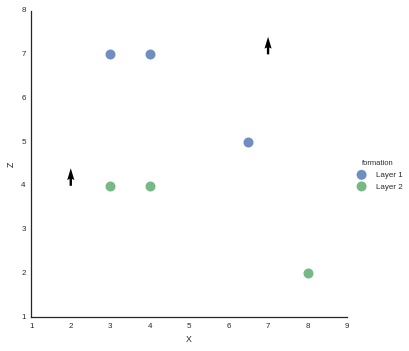

In [4]:
GeMpy.plot_data(geo_data)

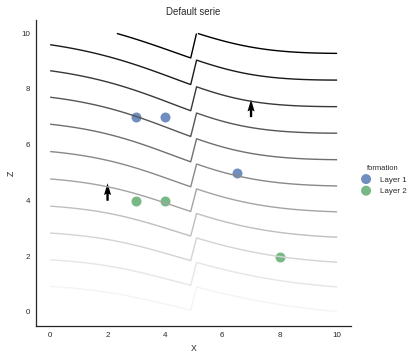

In [5]:
GeMpy.set_interpolator(geo_data, u_grade = 1)
GeMpy.plot_potential_field(geo_data, 5)


In [11]:
geo_data.interpolator.universal_matrix_T.get_value()[0,:]

array([  0.,   0.,   0., ...,  10.,  10.,  10.], dtype=float32)

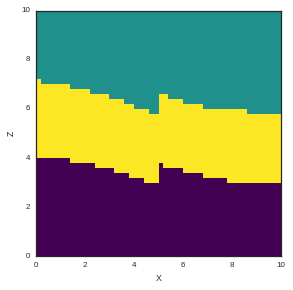

In [6]:
GeMpy.compute_block_model(geo_data)
GeMpy.plot_section(geo_data, 5)

In [7]:
geo_data.interpolator.C

array([[ 0.343333,  0.016898,  0.      ,  0.023796,  0.      , -0.071388, -0.018496, -0.107727, -0.017176, -0.135072,  1.      ,
         0.      ,  0.      ,  0.      ],
       [ 0.016898,  0.343333,  0.023796,  0.      , -0.071388,  0.      , -0.032888, -0.092423, -0.04018 , -0.075381,  1.      ,
         0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.023796,  0.343333,  0.131119,  0.      ,  0.014278, -0.036956,  0.      , -0.030427,  0.      ,  0.      ,
         1.      ,  0.      ,  0.      ],
       [ 0.023796,  0.      ,  0.131119,  0.343333,  0.014278,  0.      , -0.036091, -0.007533, -0.047088, -0.026677,  0.      ,
         1.      ,  0.      ,  0.      ],
       [ 0.      , -0.071388,  0.      ,  0.014278,  0.343333,  0.093045,  0.      ,  0.086548,  0.009938,  0.051735,  0.      ,
         0.      ,  1.      ,  0.      ],
       [-0.071388,  0.      ,  0.014278,  0.      ,  0.093045,  0.343333,  0.004805,  0.079715,  0.      ,  0.040823,  0.      ,
         0.     

In [10]:
import theano
theano.printing?#+s+ers

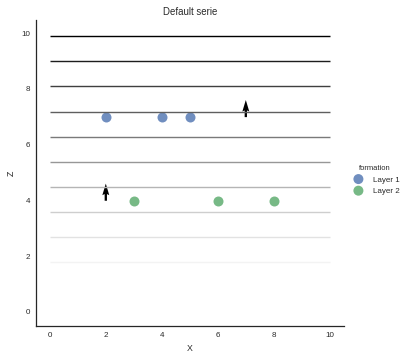

In [61]:
GeMpy.plot_potential_field(geo_data, 5)

In [11]:
%debug

> /home/bl3/anaconda3/lib/python3.5/site-packages/theano/compile/function_module.py(871)__call__()
    869                     node=self.fn.nodes[self.fn.position_of_error],
    870                     thunk=thunk,
--> 871                     storage_map=getattr(self.fn, 'storage_map', None))
    872             else:
    873                 # old-style linkers raise their own exceptions

ipdb> u
> /home/bl3/PycharmProjects/GeMpy/GeMpy/DataManagement.py(562)_aux_computations_potential_field()
    560             self.Z_x, G_x, G_y, G_z, self.potential_interfaces, self.C, self.DK = self._interpolate(
    561                 dips_position, dip_angles, azimuth, polarity,
--> 562                 rest_layer_points, ref_layer_points)[:]
    563 
    564             potential_field = self.Z_x.reshape(self._data.nx, self._data.ny, self._data.nz)

ipdb> universal_matrix
*** NameError: name 'universal_matrix' is not defined
ipdb> d
> /home/bl3/anaconda3/lib/python3.5/site-packages/th

In [30]:
fault = GeMpy.import_data([0,10,0,10,0,10])
GeMpy.set_interfaces(fault, pn.DataFrame(
      data = {"X" : [2],
            "Y" :[4],
            "Z" :[3],
            "formation" : ['fault']}) )
GeMpy.set_foliations(fault, pn.DataFrame(
      data = {"X" : [3],
             "Y" :[4],
             "Z" :[3],
              "azimuth" : 90,
              "dip" : 90,
              'polarity': 1, 
            "formation" : ['fault']}) )
fault.calculate_gradient()
GeMpy.get_raw_data(fault)

,,G_x,G_y,G_z,X,Y,Z,azimuth,dip,formation,polarity,series
interfaces,0,NaN,NaN,NaN,2,4,3,NaN,NaN,fault,NaN,Default serie
foliations,0,1.0,6.123234e-17,6.123234e-17,3,4,3,90.0,90.0,fault,1.0,Default serie


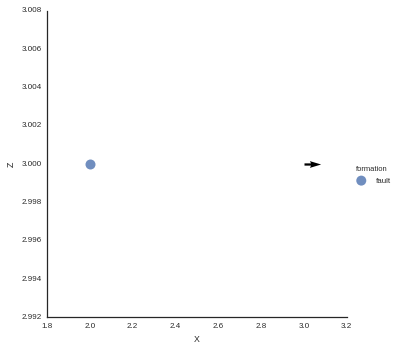

In [31]:
GeMpy.plot_data(fault)

In [33]:
GeMpy.set_interpolator(fault, u_grade = 0)

ValueError: total size of new array must be unchanged

In [36]:
a = geo_data.grid.grid

In [44]:
a * 

ValueError: operands could not be broadcast together with shapes (125000,3) (1,375000) 

In [50]:
np.tile((a[:,0] > 5), (3,1)).T 

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ..., 
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

In [7]:
import theano.tensor as T

In [20]:
g = T.matrix()
g[:].T.shape.eval({g : geo_data.grid.grid})

array([     3, 125000])

In [24]:
T.lt(g[:,0], 5).reshape(1,3).shape.eval({g :  geo_data.grid.grid})

AsTensorError: ('Cannot convert 1 to TensorType', <class 'int'>)

In [37]:
g.T.shape.eval({g:geo_data.grid.grid})

array([     3, 125000])

In [36]:
T.stack( T.lt(g[:,0], 5)).shape.eval({g:geo_data.grid.grid})

array([     1, 125000])

In [46]:
T.vertical_stack(g.T, T.stack( T.lt(g[:,0], 5))).eval({g:geo_data.grid.grid})

array([[  0.      ,   0.      ,   0.      , ...,  10.      ,  10.      ,  10.      ],
       [  0.      ,   0.      ,   0.      , ...,  10.      ,  10.      ,  10.      ],
       [  0.      ,   0.204082,   0.408163, ...,   9.591837,   9.795918,  10.      ],
       [  1.      ,   1.      ,   1.      , ...,   0.      ,   0.      ,   0.      ]])